In [5]:
%matplotlib inline


3D and 4D niimgs: handling and visualizing
==========================================

Here we discover how to work with 3D and 4D niimgs.


Downloading tutorial datasets from Internet
--------------------------------------------

Nilearn comes with functions that download public data from Internet

Let's first check where the data is downloaded on our disk:



In [6]:
from nilearn import datasets
print('Datasets are stored in: %r' % datasets.get_data_dirs())

Datasets are stored in: ['/home/lab10/nilearn_data']


Let's now retrieve a motor contrast from a Neurovault repository



In [7]:
motor_images = datasets.fetch_neurovault_motor_task()
#motor_images = '/home/lab10/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_flair.nii'
motor_images.images

['/home/lab10/nilearn_data/neurovault/collection_658/image_10426.nii.gz']

motor_images is a list of filenames. We need to take the first one



In [8]:
tmap_filename = motor_images.images[0]

Visualizing a 3D file
----------------------

The file contains a 3D volume, we can easily visualize it as a
statistical map:



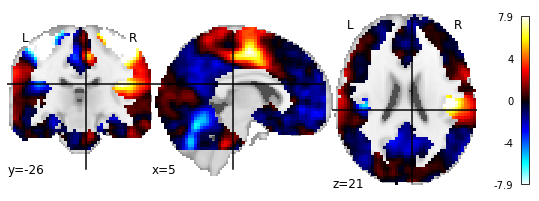

In [9]:
from nilearn import plotting
plotting.plot_stat_map(tmap_filename)

Visualizing works better with a threshold



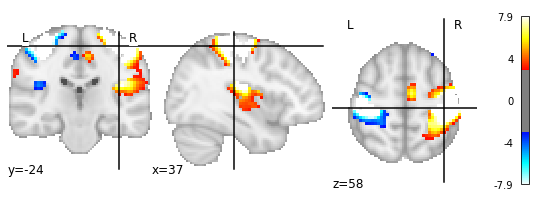

In [10]:
plotting.plot_stat_map(tmap_filename, threshold=3)

Visualizing one volume in a 4D file
-----------------------------------

We can download resting-state networks from the Smith 2009 study on
correspondance between rest and task



In [11]:
rsn = datasets.fetch_atlas_smith_2009()['rsn10']
rsn

'/home/lab10/nilearn_data/smith_2009/PNAS_Smith09_rsn10.nii.gz'

It is a 4D nifti file. We load it into the memory to print its
shape.



In [12]:
from nilearn import image
print(image.load_img(rsn).shape)

(91, 109, 91, 10)


We can retrieve the first volume (note that Python indexing starts at 0):



In [13]:
first_rsn = image.index_img(rsn, 0)
print(first_rsn.shape)

(91, 109, 91)


first_rsn is a 3D image.

We can then plot it



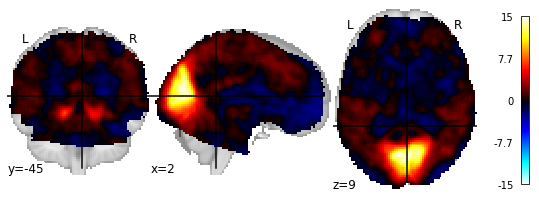

In [14]:
plotting.plot_stat_map(first_rsn)

Looping on all volumes in a 4D file
-----------------------------------

If we want to plot all the volumes in this 4D file, we can use iter_img
to loop on them.

Then we give a few arguments to plot_stat_map in order to have a more
compact display.



/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/nilearn/plotting/displays.py:1596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fraction * (x1 - x0), y1 - y0])


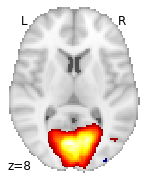

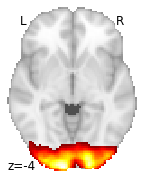

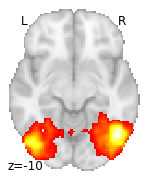

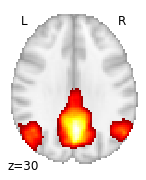

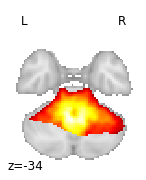

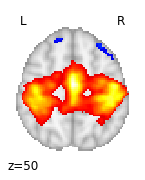

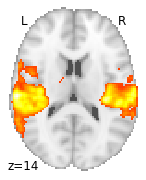

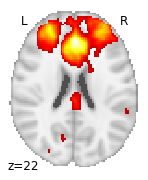

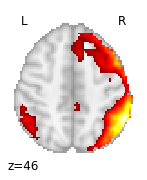

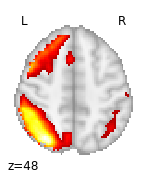

In [15]:
for img in image.iter_img(rsn):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(img, threshold=3, display_mode="z", cut_coords=1,
                           colorbar=False)

Looping through selected volumes in a 4D file
---------------------------------------------

If we want to plot selected volumes in this 4D file, we can use index_img
with the `slice` constructor to select the desired volumes. 

Afterwards, we'll use iter_img to loop through them following the same 
formula as before.



In [16]:
selected_volumes = image.index_img(rsn, slice(3, 5))

If you're new to Python, one thing to note is that the slice constructor
uses 0-based indexing. You can confirm this by matching these slices
to the previous plot above.



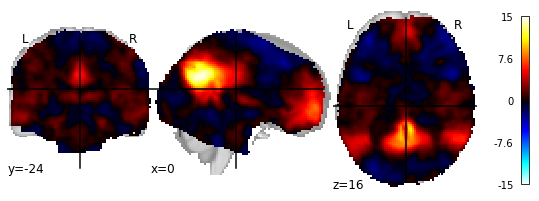

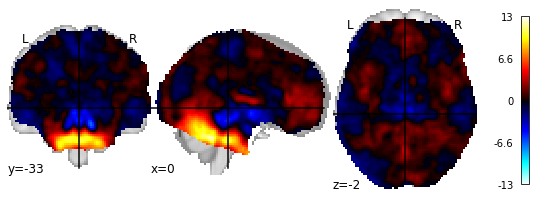

In [17]:
for img in image.iter_img(selected_volumes):
    plotting.plot_stat_map(img)

plotting.show is useful to force the display of figures when running
outside IPython



In [18]:
plotting.show()

|

______

To recap, neuroimaging images (niimgs as we call them) come in
different flavors:

* 3D images, containing only one brain volume
* 4D images, containing multiple brain volumes.

More details about the input formats in nilearn for 3D and 4D images is
given in the documentation section: `loading_data`.

Functions accept either 3D or 4D images, and we need to use on the one
hand :func:`nilearn.image.index_img` or :func:`nilearn.image.iter_img`
to break down 4D images into 3D images, and on the other hand
:func:`nilearn.image.concat_imgs` to group a list of 3D images into a 4D
image.

